In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [6]:
'''Create feaure and target'''

rng = np.random.RandomState(42)
x1 = rng.randint(1,30,200000)
x2 = rng.randint(1,30,200000)

y = 10 + 3*x1 - 2*x2 + np.random.random(200000)

# The random initialization of weights: to maintain a different weighted and to obtain non-linear model: NN 
w = np.random.random([3])

#Create the feature dataframe
x = pd.DataFrame({"intercept":np.ones_like(x1),"x1":x1,"x2":x2})

In [7]:
'''Linear Regression'''

lr = LinearRegression()
lr.fit(x.iloc[:,1:],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
lr.intercept_

10.499200395309064

In [9]:
lr.coef_

array([ 2.99997437, -1.99996033])

In [10]:
#for reference
w = [lr.intercept_ ]+ list(lr.coef_)

## Custom Codes

In [11]:
#y_ = X*Beta
def predict_y(features,weights):
    p = np.dot(features,weights)
    return p

In [12]:
#error = y - X*Beta
def error_fx(target,features,weights):
    e = target - np.dot(features,weights)
    return e

In [13]:
#cost function = error_transpose*error is a scalar
def cost_function(target,features,weights):
    e = error_fx(target,features,weights)
    cf = np.dot(e.T,e)
    return cf

In [14]:
#gradient (f(x)) = -2*x_transpose*error. IN the implementation 2 is not used as it is a constant and it will be absorbed eventually.
# Have same shape as weights
def grad_fx(target,features,weights):
    e = error_fx(target,features,weights)
    grad = - np.dot(features.T,e)/features.shape[0]
    return grad

In [34]:
#SGD
def lr_sgd (target,features,learning_rate,num_steps):
#weights are not given as arguments but is to be changed inside the function, while learning rate is an inevitable argument.
    cost = []
    weights = np.random.random(features.shape[1])
    
    for i in np.arange(num_steps):
        r_index = np.random.choice(range(features.shape[0]),10)
        #choose random index from list of feaature size and sublist target and feature 
        target_batch = target[r_index]
        features_batch = features.iloc[r_index,:]
        weights -= learning_rate*grad_fx(target_batch,features_batch,weights)
        #weights[0] -= 50*learning_rate*grad_fx(target_batch,features_batch,weights)[0] #To compensate for lower gradient value.
        cost.append(cost_function(target,features,weights))
        if i % (num_steps/10) == 0:
            print(weights)
    return [cost,weights]

In [36]:
sgd_cost,sgd_weight = lr_sgd(y,x,0.001,1000)#cannot use larger learning rate

[0.60960028 0.74652479 0.67246535]
[ 0.73572249  3.2394723  -1.7762832 ]
[ 0.87110199  3.2865478  -1.70755641]
[ 0.99516439  3.28708666 -1.73144959]
[ 1.12184759  3.28487404 -1.73544298]
[ 1.25235637  3.2564381  -1.70300408]
[ 1.38401755  3.25016749 -1.72280401]
[ 1.50733685  3.26033501 -1.73311101]
[ 1.6289837   3.26818973 -1.76030482]
[ 1.74465026  3.23534092 -1.71077034]


In [18]:
sgd_weight/w

array([0.99845312, 0.99904562, 0.99927361])

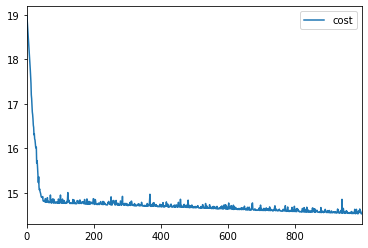

In [37]:
np.log(pd.DataFrame({"cost":sgd_cost})).plot()

## **SGD with Momentum**

In [38]:
#SGD with momentum
def lr_sgd_mom (target,features,learning_rate,num_steps):
    cost = []
    weights = np.random.random(features.shape[1])
    vw = np.zeros(features.shape[1])
    beta = 0.9
    
    for i in np.arange(num_steps):
        r_index = np.random.choice(range(features.shape[0]),10)
        #choose random index from list of feaature size and sublist target and feature 
        target_batch = target[r_index]
        features_batch = features.iloc[r_index,:]
        
        vw = beta*vw + (1-beta)*grad_fx(target_batch,features_batch,weights)
        vw_a = vw/(1-(beta**(i+1)))
        weights -= learning_rate*vw_a 
        #weights[0] -= 50*learning_rate*vw_a[0] #To compensate for lower gradient value.
        if i % (num_steps/10) == 0:
            print(weights)
        cost.append(cost_function(target,features,weights))
    return cost,weights

In [58]:
sgdm_cost,sgdm_weights = lr_sgd_mom(y,x,0.02,1000)

[0.33508206 8.50866303 2.99350089]
[ 7.22786371  2.97207677 -1.80494833]
[ 8.11624604  3.04260689 -1.96106213]
[ 8.70488192  3.07606262 -1.92928063]
[ 9.1525909   3.03632606 -1.95706226]
[ 9.48428228  3.012388   -1.93022442]
[ 9.71773475  3.03681879 -1.99426043]
[ 9.90255818  3.02084591 -1.97379322]
[10.04321676  2.99224005 -1.98861178]
[10.15111719  3.00114986 -2.00457063]


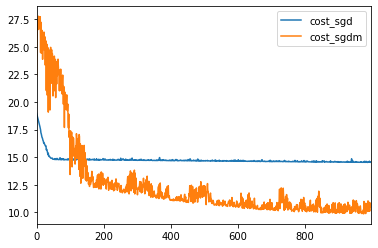

In [59]:
np.log(pd.DataFrame({"cost_sgd":sgd_cost,"cost_sgdm":sgdm_cost})).plot()

## **RMSprop**

In [41]:
#RMS_prop
def lr_rms_prop(target,features,learning_rate,num_steps):
    cost = []
    weights = np.random.random(features.shape[1])
    sw = np.zeros(features.shape[1])
    beta = 0.9
    
    for i in np.arange(num_steps):
        r_index = np.random.choice(range(features.shape[0]),10)
        #choose random index from list of feaature size and sublist target and feature 
        target_batch = target[r_index]
        features_batch = features.iloc[r_index,:]
        grad_f = grad_fx(target_batch,features_batch,weights)
        
        sw = beta*sw + (1-beta)*grad_f**2
        sw_a = sw/(1-(beta**(i+1)))
        weights -= learning_rate*(grad_f/(sw_a**0.5 + 1e-08)) 
        #weights[0] -= 50*learning_rate*(grad_f[0]/(sw_a[0]**0.5 + 1e-08)) #To compensate for lower gradient value.
        if i % (num_steps/10) == 0:
            print(weights)
        cost.append(cost_function(target,features,weights))
    return cost,weights

In [55]:
rm_cost,rm_weights = lr_rms_prop(y,x,0.05,1000)

[0.3620593  0.98589113 0.71229558]
[ 1.86144129  3.22592223 -1.78113859]
[ 5.19808334  3.14641721 -1.8539944 ]
[ 8.49783308  3.05499266 -1.93331644]
[10.43701759  2.98602104 -1.98825357]
[10.5524732   2.98635617 -2.00854616]
[10.48759308  2.99997699 -2.01596961]
[10.48274946  2.99539689 -2.01008061]
[10.5136335   3.02626876 -1.99454942]
[10.50637018  2.99777281 -2.01891415]


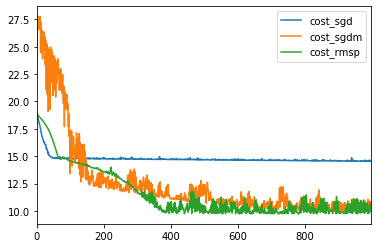

In [60]:
np.log(pd.DataFrame({"cost_sgd":sgd_cost,"cost_sgdm":sgdm_cost,"cost_rmsp":rm_cost})).plot()

## **Adaptive momentum Optimization-AdaM** -combination of SGDM & RMSP

In [50]:
#RMS_prop
def lr_adam(target,features,learning_rate,num_steps):
    cost = []
    weights = np.random.random(features.shape[1])
    sw = np.zeros(features.shape[1])
    vw = np.zeros(features.shape[1])
    beta = 0.9
    
    for i in np.arange(num_steps):
        r_index = np.random.choice(range(features.shape[0]),10)
        #choose random index from list of feaature size and sublist target and feature 
        target_batch = target[r_index]
        features_batch = features.iloc[r_index,:]
        grad_f = grad_fx(target_batch,features_batch,weights)
        
        vw = beta*vw + (1-beta)*grad_f
        sw = beta*sw + (1-beta)*grad_f**2
        vw_a = vw/(1-(beta**(i+1)))
        sw_a = sw/(1-(beta**(i+1)))
        weights -= learning_rate*(vw_a/(sw_a**0.5 + 1e-08)) 
        #weights[0] -= 50*learning_rate*(grad_f[0]/(sw_a[0]**0.5 + 1e-08)) #To compensate for lower gradient value.
        if i % (num_steps/10) == 0:
            print(weights)
        cost.append(cost_function(target,features,weights))
    return cost,weights

In [53]:
adam_cost, adam_weights = lr_adam(y,x,0.05,1000)

[0.88419715 0.6984584  0.11930405]
[ 3.42995036  3.23681253 -1.78179023]
[ 6.48458341  3.10354921 -1.86763238]
[ 9.17320107  3.04599135 -1.95376498]
[10.49327077  2.99402513 -1.9988357 ]
[10.55217706  2.98588502 -1.98994567]
[10.5103317   3.01084307 -2.00421456]
[10.48277183  3.00135464 -1.99755095]
[10.52765673  3.00784891 -1.99430258]
[10.4713982   3.00596328 -2.00015739]


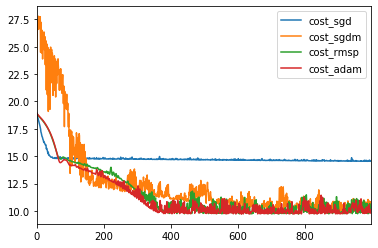

In [61]:
np.log(pd.DataFrame({"cost_sgd":sgd_cost,"cost_sgdm":sgdm_cost,"cost_rmsp":rm_cost,"cost_adam":adam_cost})).plot()